In [21]:
import numpy as np
from vae.arch import VAE
import matplotlib.pyplot as plt
batch_num = 0

In [22]:
vae = VAE()
vae.set_weights('./vae/weights.h5')

In [23]:
obs_data = np.load('./data/obs_data_car_racing_' + str(batch_num) + '.npy') 
action_data = np.load('./data/action_data_car_racing_' + str(batch_num) + '.npy')
reward_data = np.load('./data/reward_data_car_racing_' + str(batch_num) + '.npy') 
done_data = np.load('./data/done_data_car_racing_' + str(batch_num) + '.npy')
rnn_input = np.load('./data/rnn_input_' + str(batch_num) + '.npy') 
rnn_output = np.load('./data/rnn_output_' + str(batch_num) + '.npy')

In [24]:
rnn_input[0].shape

(299, 35)

In [25]:
rnn_output[0].shape

(299, 34)

[-1.16145907  0.50381821 -1.18367703  1.28263645 -1.26160877 -0.60412203
 -1.13643847  0.39341508 -0.89426659  1.79866918 -1.1611687   0.31429223
  0.92581699 -1.1796132  -0.72746764 -0.38649861  0.24985949 -0.4227441
 -0.58005775 -1.35455005  0.14457565 -1.16566672 -1.25557546 -0.30915712
  0.81428614 -0.23972352 -1.86040719 -0.09067423  1.89495872  1.94010379
 -1.08764951  1.22267808  0.          1.          0.        ]


<function matplotlib.pyplot.show>

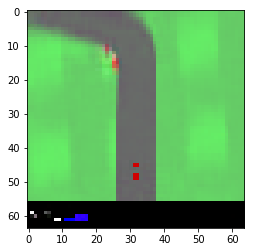

In [27]:
idx = 50
obs = rnn_input[0][idx]
print(obs)
z_decoded = vae.decoder.predict(np.array([obs[:32]]))[0]
plt.imshow(z_decoded)
plt.show